In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Replace 'your_file.csv' with the actual path to your CSV file
file_path = '/content/drive/MyDrive/Final Project/image.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(df.head())

                         ID            Category                   Artist  \
0  58c6237dedc2c9c7dc0de1ae       Impressionism  Charles Courtney Curran   
1  577280dfedc2cb3880f28e76   Neo-Expressionism             Keith Haring   
2  57727f2dedc2cb3880ed5fa9  Post-Impressionism       Jozsef Rippl-Ronai   
3  58d1240cedc2c94f900fc610              Cubism             Vadym Meller   
4  57727de7edc2cb3880e91f26         Romanticism             David Wilkie   

                                           Title  Year  \
0                       In the Luxembourg Garden  1889   
1                The Marriage of Heaven and Hell  1984   
2  Uncle Piacsek in front of the Black Sideboard  1906   
3           Monk. For the Play &#39;Mazeppa&#39;  1920   
4                   The Defence of Sarago&#231;a  1828   

                                           Image URL  \
0  https://uploads3.wikiart.org/00123/images/char...   
1  https://uploads1.wikiart.org/images/keith-hari...   
2  https://uploads3.wikiar

In [4]:
# Summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())


NameError: ignored

In [5]:
# Drop rows with missing values in the 'Year' column
df = df.dropna(subset=['Year'])

# Filter rows with a single year format (e.g., "1900") and remove others
single_year_format = df['Year'].str.match(r'^\d{4}$')
df = df[single_year_format]

NameError: ignored

In [6]:
# Filter rows with only alphabets and spaces in the 'Title' column
alpha_title_format = df['Title'].str.replace(' ', '').str.isalpha()
df = df[alpha_title_format]

# Filter rows with only alphabets and spaces in the 'Title' column
alpha_title_format = df['Artist'].str.replace(' ', '').str.isalpha()
df = df[alpha_title_format]
print(df)

df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df.to_csv('/content/drive/MyDrive/Final Project/cleaned_dataset.csv', index=False)

NameError: ignored

In [ ]:
df = df.rename(columns={'artist': 'Artist', 'title': 'Title', 'date': 'Year', 'genre':'Genre'})

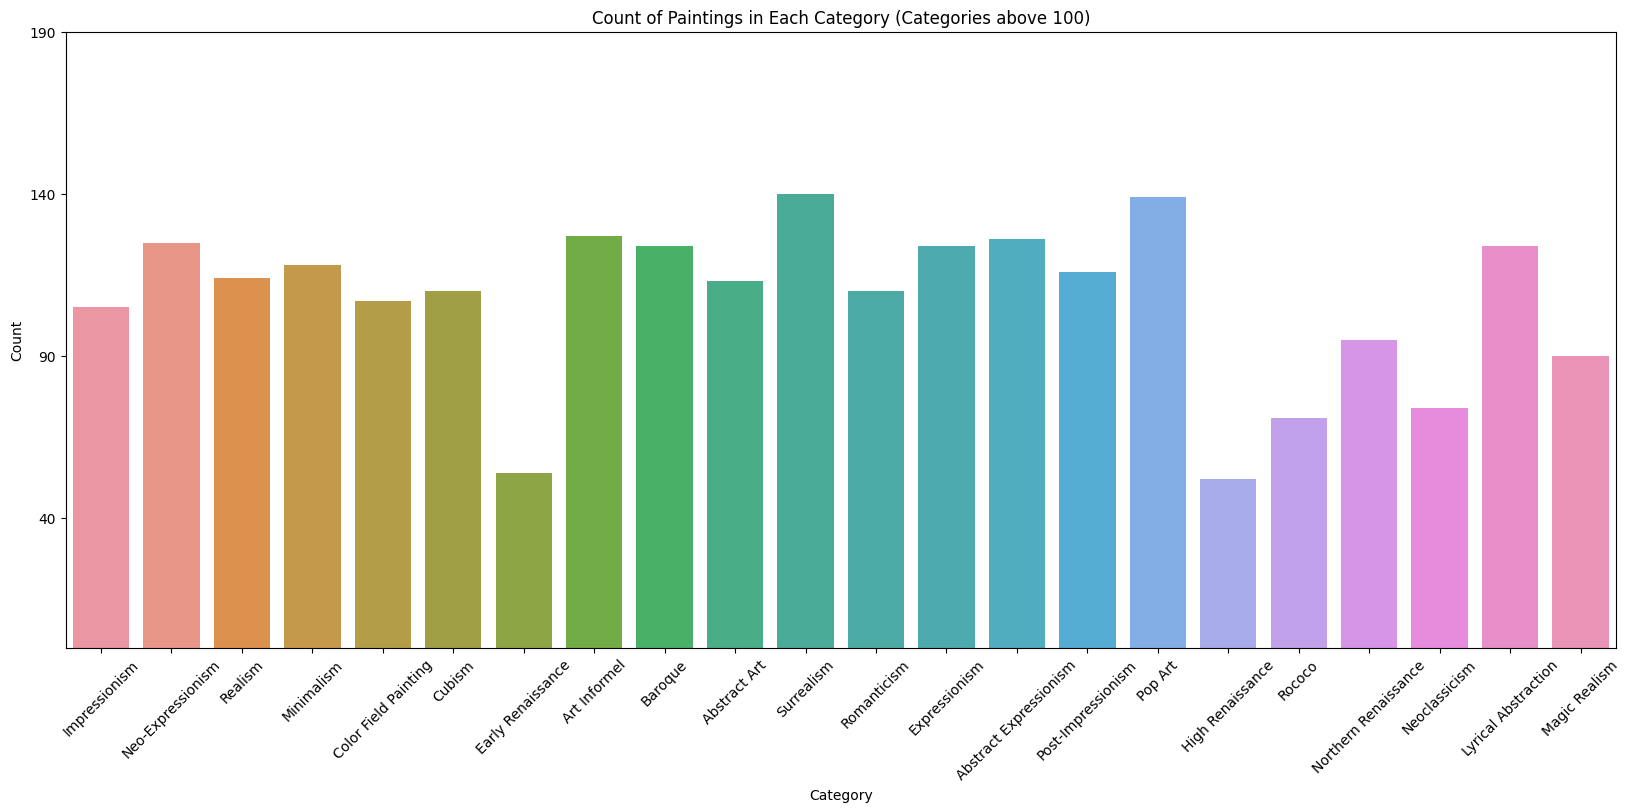

In [ ]:
# Filter categories with counts above 100
categories_above_100 = df['Category'].value_counts()[df['Category'].value_counts() > 50].index

# Count plot of selected categories
plt.figure(figsize=(20, 8))
sns.countplot(x='Category', data=df[df['Category'].isin(categories_above_100)])
plt.title('Count of Paintings in Each Category (Categories above 100)')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.yticks(range(40, 201, 50))  # Set y-axis labels at intervals of 50, up to 250

plt.show()

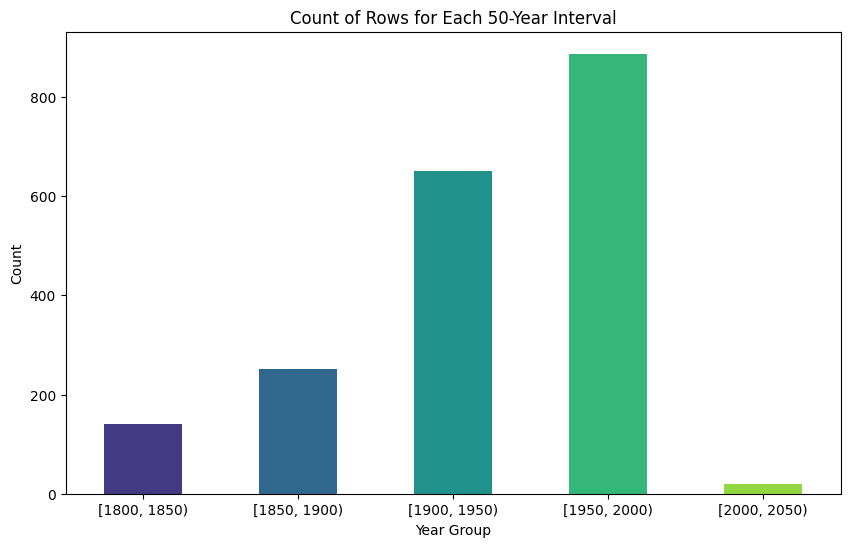

In [ ]:
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Define bins for grouping years in intervals of 50 years
bins = range(1800, 2051, 50)

# Create a new column 'Year_Group' indicating the bin for each year
df['Year_Group'] = pd.cut(df['Year'], bins=bins, right=False, include_lowest=True)

# Count the number of rows for each year group
rows_count_yearwise = df.groupby('Year_Group').size()

# Define custom colors for each bar
custom_colors = sns.color_palette("viridis", len(rows_count_yearwise))

# Plot the count of rows for each year group
plt.figure(figsize=(10, 6))
rows_count_yearwise.plot(kind='bar', color=custom_colors)
plt.title('Count of Rows for Each 50-Year Interval')
plt.xlabel('Year Group')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [ ]:
# Count the number of occurrences for each artist
top_artists = df['Artist'].value_counts().head(10)

# Display the result
print('Top 10 Artists:')
print(top_artists)

Top 10 Artists:
Eyvind Earle                 24
Willi Baumeister             17
Sam Francis                  15
Corneille                    14
Tivadar Kosztka Csontvary    14
John Ferren                  12
Paul Klee                    12
Kazuo Shiraga                11
Agnes Martin                 10
Francisco de Zurbaran        10
Name: Artist, dtype: int64


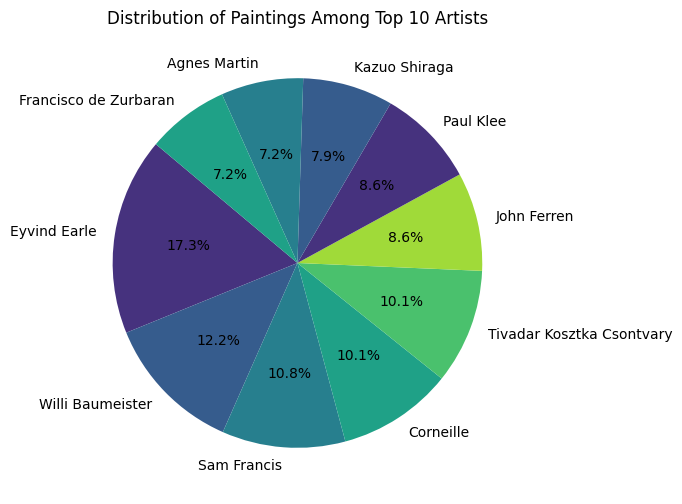

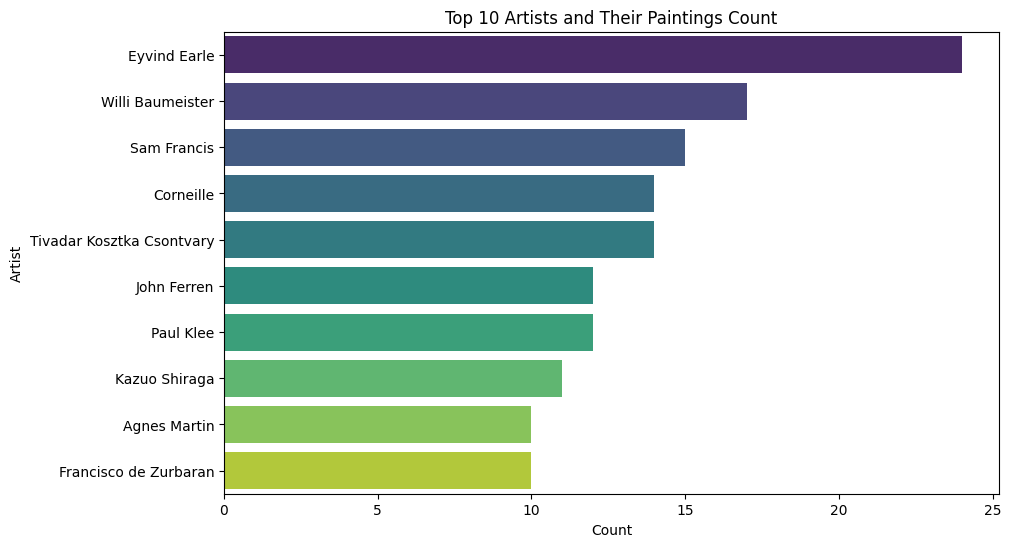

In [ ]:
# Plot the counts of the top 10 artists using a pie chart
plt.figure(figsize=(10, 6))
plt.pie(top_artists, labels=top_artists.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis"))
plt.title('Distribution of Paintings Among Top 10 Artists')
plt.show()


# Plot the counts of the top 10 artists using a horizontal bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_artists.values, y=top_artists.index, palette="viridis")
plt.title('Top 10 Artists and Their Paintings Count')
plt.xlabel('Count')
plt.ylabel('Artist')
plt.show()

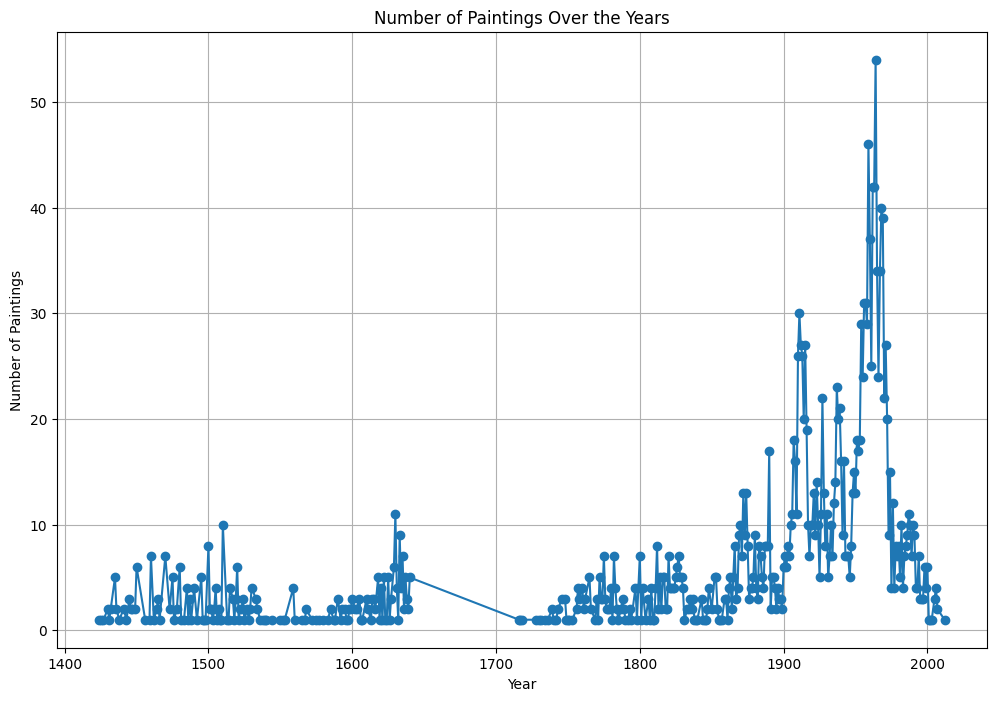

In [ ]:
# Group by 'Year' and count the number of paintings for each year
time_series_data = df['Year'].value_counts().sort_index()

# Create a time series plot
plt.figure(figsize=(12, 8))
plt.plot(time_series_data.index, time_series_data.values, marker='o', linestyle='-')
plt.title('Number of Paintings Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Paintings')
plt.grid(True)
plt.show()
